# Importing Libraries

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

# Loading the data

In [2]:
data = arff.loadarff('../Dataset/EEG_Eye_State.arff')
df = pd.DataFrame(data[0])

# Preprocessing

In [3]:
df['eyeDetection'] = df['eyeDetection'].astype('int')

# Data visualization

In [4]:
df.columns

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')

<AxesSubplot:>

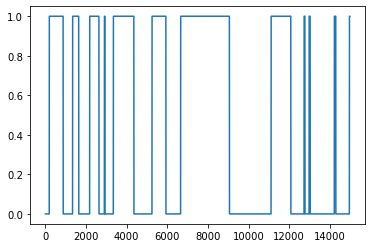

In [5]:
df['eyeDetection'].plot()

<AxesSubplot:>

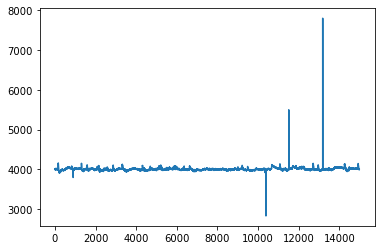

In [6]:
df['F7'].plot()

<AxesSubplot:>

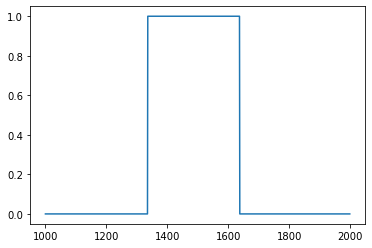

In [7]:
df['eyeDetection'][1000:2000].plot()

<AxesSubplot:>

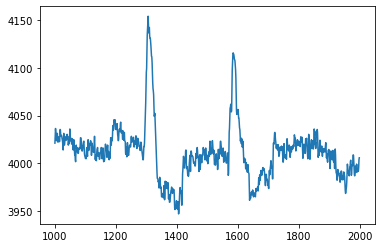

In [8]:
df['F7'][1000:2000].plot()

<AxesSubplot:>

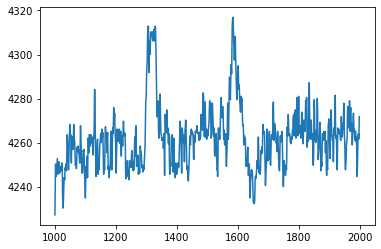

In [9]:
df['F3'][1000:2000].plot()

# Data Cleaning

## Outlier removal

In [10]:
import pandas as pd
from scipy import stats
from copy import deepcopy

temp_data_frame = deepcopy(df)
clean_data_frame = deepcopy(df)
for column in temp_data_frame.columns[:-1]:
    temp_data_frame[str(column)+'z_score'] = stats.zscore(temp_data_frame[column])
    clean_data_frame[column] = temp_data_frame.loc[temp_data_frame[str(column)+'z_score'].abs()<=3][column]

clean_data_frame.interpolate(method='linear', inplace=True)

temp_data_frame = deepcopy(clean_data_frame)
clean_data_frame_second = deepcopy(clean_data_frame)

for column in temp_data_frame.columns[:-1]:
    temp_data_frame[str(column)+'z_score'] = stats.zscore(temp_data_frame[column])
    clean_data_frame_second[column] = temp_data_frame.loc[temp_data_frame[str(column)+'z_score'].abs()<=3][column]

clean_data_frame_second.interpolate(method='linear', inplace=True)

In [11]:
feature = 'O1'

<AxesSubplot:>

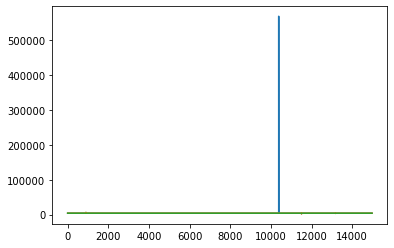

In [12]:
df[feature].plot()
clean_data_frame[feature].plot()
clean_data_frame_second[feature].plot()

<AxesSubplot:>

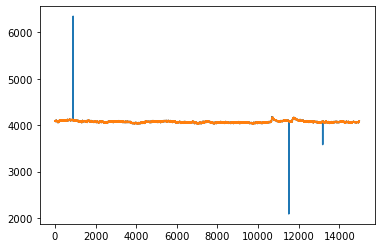

In [13]:
clean_data_frame[feature].plot()
clean_data_frame_second[feature].plot()

<AxesSubplot:>

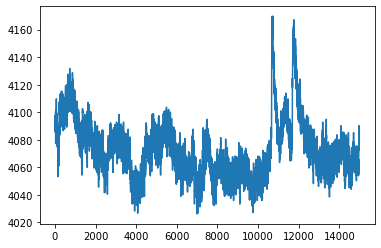

In [14]:
clean_data_frame_second[feature].plot()

## normalize the channels

In [15]:
# normalize the columns between -1 and 1


clean_data_frame_second_normalized = 2*(clean_data_frame_second - clean_data_frame_second.mean()) / (clean_data_frame_second.max() - clean_data_frame_second.min())

<AxesSubplot:>

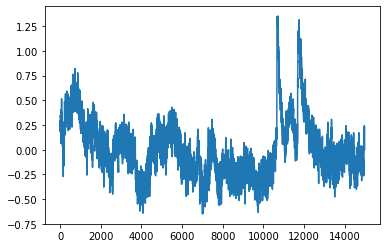

In [16]:
clean_data_frame_second_normalized[feature].plot()

In [17]:
data = clean_data_frame_second_normalized

# Adding derivative 1 column

<AxesSubplot:>

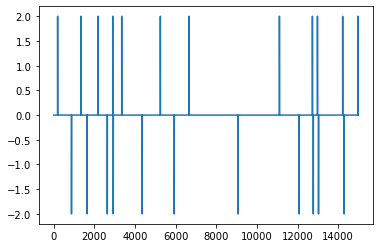

In [37]:
# compute derivative of last column
data['edge'] = data['eyeDetection'].diff()
data['edge'][0] = 0.0
data['edge'].plot()

In [38]:
starting = data['edge'][data['edge'] == 2]
starting = starting[:-1]

starting_time = starting.index.values

ending = data['edge'][data['edge'] == -2]
ending_time = ending.index.values

In [39]:
ending_time

array([  871,  1638,  2633,  2927,  4352,  5928,  9054, 12076, 12771,
       13028, 14289])

In [40]:
end_time_with_0 = np.insert(ending_time, 0, 0)
end_time_with_0

array([    0,   871,  1638,  2633,  2927,  4352,  5928,  9054, 12076,
       12771, 13028, 14289])

In [41]:
starting_time

array([  188,  1336,  2176,  2900,  3342,  5244,  6653, 11105, 12728,
       12976, 14217])

<AxesSubplot:>

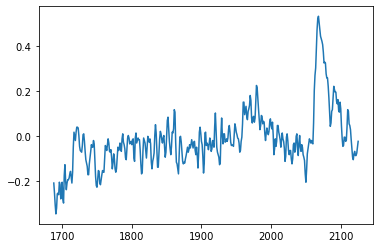

In [42]:
data['AF3'][end_time_with_0[2]+50:starting_time[2]-50].plot()

# zero-one chopping the data

In [43]:
signal_0 = []
singal_1 = []
length = 100

# create signal 0
for start, end in zip(end_time_with_0, starting_time):
    for i in range(start+50, end-length-50, 5):
        temp = []
        for channel in data.columns[:-2]:
            temp.append(data[channel][i:i+length])

        signal_0.append(np.hstack(temp))

# create signal 1
for start, end in zip(starting_time, ending_time):
    for i in range(start+50, end-length-50, 5):
        temp = []
        for channel in data.columns[:-2]:
            temp.append(data[channel][i:i+length])

        singal_1.append(np.hstack(temp))


df_0 = pd.DataFrame(signal_0)
df_1 = pd.DataFrame(singal_1)

print("before chopping")
print(df_0.shape)
print(df_1.shape)

min_samples = min(df_0.shape[0], df_1.shape[0]) - 1

# chop the data to the same length
df_0 = df_0.iloc[:min_samples, :]
df_1 = df_1.iloc[:min_samples, :]

print("after chopping")
print(df_0.shape)
print(df_1.shape)

df_0.to_csv('../../../Dataset/EEG_Eye_State_ZeroOne_chop_all_0.csv', index=False)
df_1.to_csv('../../../Dataset/EEG_Eye_State_ZeroOne_chop_all_1.csv', index=False)

before chopping
(1083, 1400)
(1025, 1400)
after chopping
(1024, 1400)
(1024, 1400)


## Test the dataset

In [44]:
test_df_0 = pd.read_csv('../../../Dataset/EEG_Eye_State_ZeroOne_chop_all_0.csv')
test_df_1 = pd.read_csv('../../../Dataset/EEG_Eye_State_ZeroOne_chop_all_1.csv')

print(test_df_0.shape)
print(test_df_1.shape)

(1024, 1400)
(1024, 1400)


In [45]:
test_df_0

,0,1,2,3,4,5,6,7,8,9,...,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399
0,-0.220739,-0.202250,-0.180005,-0.150394,-0.161516,-0.191128,-0.224423,-0.305962,-0.383674,-0.428164,...,-0.243059,-0.276602,-0.310218,-0.284097,-0.198238,-0.149779,-0.142284,-0.145995,-0.179611,-0.190816
1,-0.191128,-0.224423,-0.305962,-0.383674,-0.428164,-0.417041,-0.405919,-0.428164,-0.409602,-0.339257,...,-0.149779,-0.142284,-0.145995,-0.179611,-0.190816,-0.145995,-0.101247,-0.093752,-0.112452,-0.145995
2,-0.417041,-0.405919,-0.428164,-0.409602,-0.339257,-0.291084,-0.298523,-0.302207,-0.309646,-0.335574,...,-0.145995,-0.101247,-0.093752,-0.112452,-0.145995,-0.231854,-0.280386,-0.172116,-0.075125,-0.116163
3,-0.291084,-0.298523,-0.302207,-0.309646,-0.335574,-0.365185,-0.394797,-0.387430,-0.391113,-0.409602,...,-0.231854,-0.280386,-0.172116,-0.075125,-0.116163,-0.131079,-0.104957,-0.116163,-0.127368,-0.078836
4,-0.365185,-0.394797,-0.387430,-0.391113,-0.409602,-0.398552,-0.346696,-0.254106,-0.228178,-0.291084,...,-0.131079,-0.104957,-0.116163,-0.127368,-0.078836,-0.037798,-0.052715,-0.067703,-0.037798,-0.015461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,-0.113344,-0.102221,-0.109660,-0.065171,-0.017070,-0.028120,-0.020754,0.001491,-0.035559,-0.046682,...,-0.045293,-0.037798,-0.007966,-0.041582,-0.086330,-0.108741,-0.123657,-0.131079,-0.138573,-0.123657
1020,-0.028120,-0.020754,0.001491,-0.035559,-0.046682,-0.002192,-0.002192,-0.042998,-0.076293,-0.091099,...,-0.108741,-0.123657,-0.131079,-0.138573,-0.123657,-0.101247,-0.119874,-0.157200,-0.160984,-0.149779
1021,-0.002192,-0.002192,-0.042998,-0.076293,-0.091099,-0.087416,-0.076293,-0.054049,-0.046682,-0.072610,...,-0.101247,-0.119874,-0.157200,-0.160984,-0.149779,-0.168406,-0.190816,-0.175900,-0.175900,-0.187105
1022,-0.087416,-0.076293,-0.054049,-0.046682,-0.072610,-0.057804,-0.002192,0.008858,-0.009631,-0.017070,...,-0.168406,-0.190816,-0.175900,-0.175900,-0.187105,-0.153489,-0.093752,-0.071414,-0.041582,-0.019171


In [46]:
signal_1_0 = test_df_0.iloc[0,0:100]
signal_2_0 = test_df_0.iloc[0,100:199]

signal_1_1 = test_df_1.iloc[0,0:100]
signal_2_1 = test_df_1.iloc[0,100:199]

<AxesSubplot:>

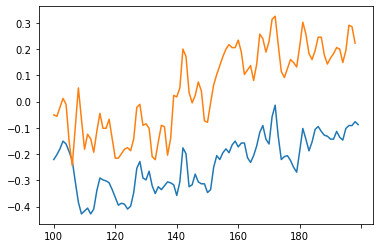

In [47]:
signal_1_0.plot()
signal_2_0.plot()

<AxesSubplot:>

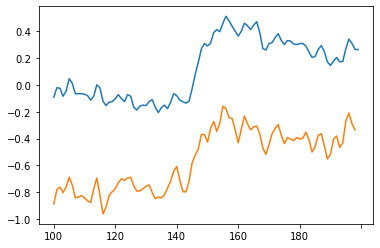

In [48]:
signal_1_1.plot()
signal_2_1.plot()